In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp

import lsst.sims.maf.db as db
import lsst.sims.maf.utils as utils
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.stackers as stackers
import lsst.sims.maf.metricBundles as metricBundles

In [2]:
dbFile = 'my_baseline_1yrs.db'
# This connection checks which version it thinks the database is and should do the right thing schema-wise
conn = db.Database(dbFile, defaultTable='observations')
outDir='temp'
resultsDb = db.ResultsDb(outDir=outDir)

In [3]:
bundleList = []
nside = 128
metric = metrics.MedianMetric(col='fivesigmadepth')
slicer = slicers.HealpixSlicer(latCol='dec', lonCol='RA', nside=nside)
sql = 'filter="r"'

bundleList.append(metricBundles.MetricBundle(metric,slicer,sql))

Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes


Querying database observations with constraint filter="r" for columns ['RA', 'dec', 'fivesigmadepth']
Found 54023 visits
Running:  ['opsim_Median_fivesigmadepth_r_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "filter="r"" constraint now.
monopole: 24.0103  dipole: lon: -50.1151, lat: -57.3763, amp: 0.160282
Plotting complete.


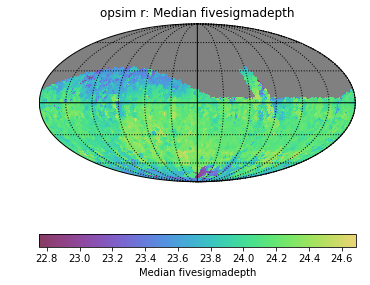

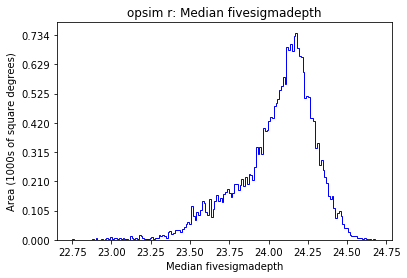

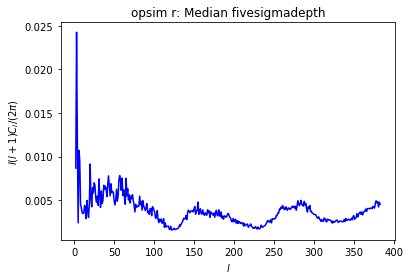

In [4]:
bd = metricBundles.makeBundlesDictFromList(bundleList)
bg = metricBundles.MetricBundleGroup(bd, conn, outDir=outDir, resultsDb=resultsDb)
bg.runAll()
bg.plotAll(closefigs=False)

/Users/yoachim/gitRepos/sims_featureScheduler/python/lsst/sims/featureScheduler/utils.py:27: UserWarning: Could not import ts.scheduler. This is required to load the FieldsDatabase. In this case
it will fallback to loading fields from the local "fieldID.lis" file.
  it will fallback to loading fields from the local "fieldID.lis" file.''')


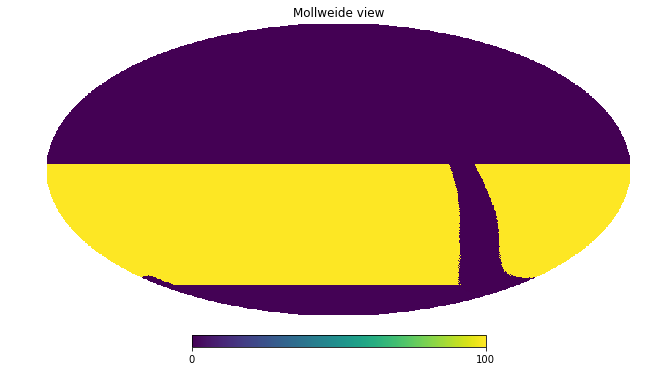

In [5]:
import lsst.sims.featureScheduler as fs
wfd_area = fs.generate_goal_map(nside=nside,WFD_fraction=100)
hp.mollview(wfd_area)

In [6]:
wfd_pix = np.where(wfd_area == 100)[0]
median_of_wfd = np.median(bundleList[0].metricValues[wfd_pix])
median_of_wfd

/Users/yoachim/lsstp3/python/miniconda3-4.3.21/lib/python3.6/site-packages/numpy/core/fromnumeric.py:639: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


24.151616023361534

In [7]:
# just to check that's different from using all the values
np.median(bundleList[0].metricValues)

/Users/yoachim/lsstp3/python/miniconda3-4.3.21/lib/python3.6/site-packages/numpy/core/fromnumeric.py:639: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


23.901055313815618